In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv(r'C:\Users\sreer\Downloads\Sales_add.csv')

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
data.shape

(22, 5)

In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [8]:
data.describe(include='object')

,Month,Region,Manager
count,22,22,22
unique,22,3,3
top,Month-13,Region - A,Manager - A
freq,1,10,9


In [9]:
data['Region'].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

<AxesSubplot:title={'center':'Region wise list of managers and the sale before digital add (in $)'}, xlabel='Manager', ylabel='Sales_before_digital_add(in $)'>

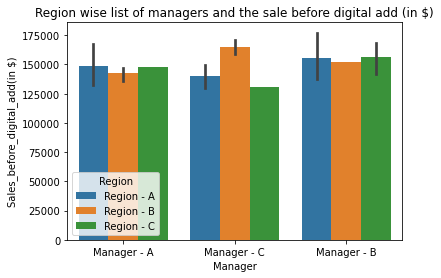

In [10]:
plt.title('Region wise list of managers and the sale before digital add (in $)')
sns.barplot(x='Manager',y='Sales_before_digital_add(in $)',hue='Region',data=data)

<AxesSubplot:title={'center':'Region wise list of managers and Sales_After_digital_add(in $)'}, xlabel='Manager', ylabel='Sales_After_digital_add(in $)'>

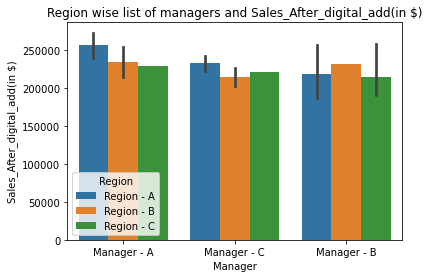

In [11]:
plt.title('Region wise list of managers and Sales_After_digital_add(in $)')
sns.barplot(x='Manager',y='Sales_After_digital_add(in $)',hue='Region',data=data)

### A company started to invest in digital marketing as a new way of their product
### promotions.For that they collected data and decided to carry out a study on it.
####  1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

In [21]:
print("""Null Hypothesis is: 
         sales before digital add  is equal to sales after digital add """)
print("""Alternate hypothesis is: 
         sale before digital add is less than sale after digital add """)

x=data['Sales_before_digital_add(in $)']
y=data['Sales_After_digital_add(in $)']

ttest,pvalue=stats.ttest_ind(x,y,alternative='less')

print("Test statistics is %.6f"%ttest)
print(pvalue)
print('p_value:',pvalue.astype(int))
print('')
if pvalue<0.05:
      print("""Conclusion:-
             Since,pvalue is less than 0.05,We reject the null hypothesis H0,that is sales 
             after stepping into digital is  equal to the sales before digital.So we can conclude that there is an increase 
             in the sales after stepping into digital marketing""",sep='/n')
else:
    print("We accept null hypothesis")

Null Hypothesis is: 
         sales before digital add  is equal to sales after digital add 
Alternate hypothesis is: 
         sale before digital add is less than sale after digital add 
Test statistics is -12.995084
1.3071840034523225e-16
p_value: 0

Conclusion:-
             Since,pvalue is less than 0.05,We reject the null hypothesis H0,that is sales 
             after stepping into digital is  equal to the sales before digital.So we can conclude that there is an increase 
             in the sales after stepping into digital marketing


#### 2.The company needs to check whether there is any dependency between the features “Region” and “Manager”.


In [13]:
data[['Region','Manager']].describe(include='object')

,Region,Manager
count,22,22
unique,3,3
top,Region - A,Manager - A
freq,10,9


In [14]:
region_manager_before_digital=data.groupby(['Region','Manager'],as_index=False)['Sales_before_digital_add(in $)'].mean()
print(region_manager_before_digital)

x=region_manager_before_digital['Sales_before_digital_add(in $)']

       Region      Manager  Sales_before_digital_add(in $)
0  Region - A  Manager - A                   148628.500000
1  Region - A  Manager - B                   155617.000000
2  Region - A  Manager - C                   140228.000000
3  Region - B  Manager - A                   142725.000000
4  Region - B  Manager - B                   152167.000000
5  Region - B  Manager - C                   165299.000000
6  Region - C  Manager - A                   147463.000000
7  Region - C  Manager - B                   156492.333333
8  Region - C  Manager - C                   130625.000000


In [15]:
region_manager_after_digital=data.groupby(['Region','Manager'],as_index=False)['Sales_After_digital_add(in $)'].mean()
print(region_manager_after_digital)

y=region_manager_after_digital['Sales_After_digital_add(in $)']

       Region      Manager  Sales_After_digital_add(in $)
0  Region - A  Manager - A                  257609.250000
1  Region - A  Manager - B                  218944.000000
2  Region - A  Manager - C                  233754.000000
3  Region - B  Manager - A                  234962.750000
4  Region - B  Manager - B                  231808.000000
5  Region - B  Manager - C                  214718.000000
6  Region - C  Manager - A                  229336.000000
7  Region - C  Manager - B                  214551.333333
8  Region - C  Manager - C                  222106.000000


In [16]:
print("""Null hypothesis is:-
         There is relation between the features Region and Manager""")
print("""Alternate hypothesis is:-
         There is no relation between the features Region and Manager""")

ttest,pval=stats.ttest_rel(x,y)

print("Test statistics:- %.6f"%ttest)
print("P_value is :-", pval.astype(int))

if pval<0.05:
    print("""Conclusion:-
             Since pvalue is less than the alpha value(0.05),We reject the null hypothesis H0,that is there is an impact of 
             region and manager on the sales.We can conclude that Region and Manager is not impacting the sales """)
else:
    print("Failed to reject null hypothesis")

Null hypothesis is:-
         There is relation between the features Region and Manager
Alternate hypothesis is:-
         There is no relation between the features Region and Manager
Test statistics:- -12.363532
P_value is :- 0
Conclusion:-
             Since pvalue is less than the alpha value(0.05),We reject the null hypothesis H0,that is there is an impact of 
             region and manager on the sales.We can conclude that Region and Manager is not impacting the sales 
